In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

In [2]:
# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

from dateutil.relativedelta import relativedelta

In [3]:
Credit_Card = pd.read_excel("Credit Card Data.xlsx")
Customers = pd.read_csv("Customer Acqusition.csv")
Repay = pd.read_csv("Repayment.csv")
Spend = pd.read_csv("spend.csv")

In [6]:
mean_value = Customers['Age'].mean()
mean_value

46.49

In [7]:
Customers.loc[Customers["Age"]<18, "Age"] = mean_value

In [8]:
Cust_spend = pd.merge(Customers,Spend, how ='inner',left_on = 'Customer',right_on = 'Customer')

In [12]:
Cust_spend.loc[Cust_spend['Amount']> Cust_spend['Limit'],"Amount"]= 0.5 * Cust_spend['Limit']
Cust_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00


In [9]:
Repay

,SL No:,Customer,Month,Amount
0,1,A1,12-Jan-04,495414.75
1,2,A1,3-Jan-04,245899.02
2,3,A1,15-Jan-04,259490.06
3,4,A1,25-Jan-04,437555.12
4,5,A1,17-Jan-05,165972.88
...,...,...,...,...
1495,1496,A67,9-May-05,55638.77
1496,1497,A68,10-May-06,319836.49
1497,1498,A69,11-Jul-06,247628.45
1498,1499,A70,12-Aug-05,454016.51


In [10]:
Cust_repay = pd.merge(Customers,Repay, how ='inner',left_on = 'Customer',right_on = 'Customer')
Cust_repay.loc[Cust_repay['Amount']> Cust_repay['Limit'],"Amount"]= Cust_spend['Limit']
Cust_repay

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,100000.00
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,10000.00
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,10001.00
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,10002.00


In [16]:
Customers.Customer.nunique()

100

In [17]:
Cust_spend.Customer.nunique()

100

In [11]:
Customers.Segment.nunique()
Customers.Segment.drop_duplicates()

0    Self Employed
1     Salaried_MNC
2     Salaried_Pvt
3             Govt
4    Normal Salary
Name: Segment, dtype: object

In [12]:
Cust_spend.Type.nunique()

15

In [20]:
Cust_spend.Type.drop_duplicates()

0         JEWELLERY
1             PETRO
2           CLOTHES
3              FOOD
4            CAMERA
5           SANDALS
6               CAR
7      TRAIN TICKET
8        BUS TICKET
9        AIR TICKET
11     MOVIE TICKET
12           RENTAL
82             BIKE
99             AUTO
117        SHOPPING
Name: Type, dtype: object

 **What is the average monthly spend by customers?**


In [13]:
Cust_repay

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,100000.00
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,10000.00
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,10001.00
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,10002.00


In [14]:
Cust_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,139018.26
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,284521.06
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,90184.22


In [27]:
Spend['years'] = pd.to_datetime(Spend['Month']).dt.year
Spend['month'] = pd.to_datetime(Spend['Month']).dt.month


In [16]:
Spend.groupby(['years','month']).Amount.mean().round(2)

years  month
2004   1        251712.07
       2        221215.27
       3        232146.12
       4        235272.04
       5        217539.24
       9        310923.38
       11       270486.40
2005   1        292741.37
       2        229802.28
       4        252181.33
       5        245696.52
       6        262688.11
       7        229116.66
       8        233734.63
       9        188666.20
       10       194568.64
       11       286143.32
       12       147503.06
2006   1        282058.01
       2        253858.26
       3        247166.08
       4        232468.97
       5        236162.74
       6        177252.39
       7        287505.10
       8        240699.72
       9        158520.09
       10       236136.34
       11       182841.29
       12       270470.98
Name: Amount, dtype: float64

In [17]:
Repay['R_years'] = pd.to_datetime(Repay['Month']).dt.year
Repay['R_month'] = pd.to_datetime(Repay['Month']).dt.month
Repay
Repay.groupby(['R_years','R_month']).Amount.mean().round(2)

R_years  R_month
2004     1          243489.65
         2          256702.63
         3          252585.28
         4          259141.68
         5          226162.72
         9          184487.85
         11         209592.24
2005     1          240548.10
         2          238829.27
         4          212688.63
         5          263207.37
         6          210199.82
         7          239871.48
         8          264430.92
         9          247700.17
         10         219849.96
         11         256695.12
         12         320379.34
2006     1          293475.39
         2          284489.57
         3          240851.27
         4          275472.25
         5          256920.88
         6          251990.45
         7          257936.38
         8          224143.99
         9          262533.88
         10         260765.48
         11         199399.20
         12         252736.57
Name: Amount, dtype: float64

 **If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment 
– Monthly spend. Interest is earned only on positive profits and not on negative amounts)**


In [18]:
Cust_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,139018.26
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,284521.06
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,90184.22


In [81]:
Cust_rep = Cust_repay.loc[ : ,['Customer','Product','Month','Amount']]
Cust_rep
Complete_data = pd.merge(Cust_spend,Cust_rep,how='inner',left_on='Customer',right_on = 'Customer')
Complete_data = Complete_data.rename(columns = {'Amount_x':'Spend_amount','Amount_y':'Repay_amount'})
Complete_data

,No,Customer,Age,City,Product_x,Limit,Company,Segment,Sl No:,Month_x,Type,Spend_amount,Age_group,years,months,Product_y,Month_y,Repay_amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,"(70, 80]",2004,1,Gold,12-Jan-04,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,"(70, 80]",2004,1,Gold,3-Jan-04,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,"(70, 80]",2004,1,Gold,15-Jan-04,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,"(70, 80]",2004,1,Gold,25-Jan-04,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,"(70, 80]",2004,1,Gold,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,"(50, 60]",2004,1,Silver,25-Jan-04,100000.00
37280,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,139018.26,"(50, 60]",2004,1,Platimum,12-Jan-04,10000.00
37281,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,284521.06,"(50, 60]",2004,1,Platimum,3-Jan-04,10001.00
37282,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,90184.22,"(30, 40]",2004,1,Platimum,15-Jan-04,10002.00


In [82]:
Comp_data = Complete_data.loc[ : ,['years','months','Spend_amount','Repay_amount']]

In [91]:
Comp_data = Comp_data.groupby(['years','months'])['Spend_amount','Repay_amount'].sum()
Comp_data['Monthly_profit']= Comp_data['Repay_amount'] - Comp_data['Spend_amount']
Comp_data

C:\Users\Toshiba\AppData\Local\Temp/ipykernel_5088/3517633858.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Comp_data = Comp_data.groupby(['years','months'])['Spend_amount','Repay_amount'].sum()


Spend_amount  Repay_amount  Monthly_profit
years months                                            
2005  12      5.088172e+07  5.857031e+07      7688582.16
2006  9       6.765554e+07  8.424755e+07     16592005.48
      11      1.141199e+08  1.205240e+08      6404103.84

In [90]:
Comp_data = Comp_data[Comp_data['Monthly_profit']>0]
Comp_data['Profit']=round(0.029* Comp_data['Monthly_profit'],2)
Comp_data

Spend_amount  Repay_amount  Monthly_profit     Profit
years months                                                       
2005  12      5.088172e+07  5.857031e+07      7688582.16  222968.88
2006  9       6.765554e+07  8.424755e+07     16592005.48  481168.16
      11      1.141199e+08  1.205240e+08      6404103.84  185719.01

**What are the top 5 product types?**

In [29]:
Cust_spend.groupby('Type').Amount.sum().sort_values(ascending = False).head(5)

Type
PETRO           49863174.09
CAMERA          41481571.96
FOOD            37773338.43
TRAIN TICKET    33067077.15
AIR TICKET      32955445.42
Name: Amount, dtype: float64

**Which city is having maximum spend?**


In [30]:
Cust_spend.groupby('City').Amount.sum().sort_values(ascending = False).head(1)

City
COCHIN    73495349.26
Name: Amount, dtype: float64

**Which age group is spending more money?**


In [31]:
Cust_spend.groupby('Age').Amount.sum().sort_values(ascending = False).head(1)


Age
28.0    25098877.03
Name: Amount, dtype: float64

In [32]:
Cust_spend.Age

0       76.0
1       76.0
2       76.0
3       76.0
4       76.0
        ... 
1495    54.0
1496    58.0
1497    51.0
1498    35.0
1499    36.0
Name: Age, Length: 1500, dtype: float64

In [33]:
Age_group = pd.cut(Cust_spend.Age,range(10,90,10))
Age_group
Cust_spend['Age_group']=Age_group
Cust_spend.groupby('Age_group').Amount.sum().sort_values(ascending = False)

Age_group
(20, 30]    85242784.40
(40, 50]    76398230.39
(30, 40]    68525439.61
(50, 60]    66095358.93
(70, 80]    36389507.50
(60, 70]    28996953.21
(10, 20]     2995800.15
Name: Amount, dtype: float64

In [34]:
Cust_repay

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,495414.75
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,245899.02
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,259490.06
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,437555.12
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,100000.00
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,10000.00
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,10001.00
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,10002.00


In [34]:
Cust_repay.groupby('Customer').Amount.sum().sort_values(ascending = False).head(10)

Customer
A61    10539142.91
A60     9876290.74
A13     9572000.66
A43     8489871.46
A45     8448334.87
A12     8334760.16
A14     7943268.63
A44     7744730.12
A39     7622483.30
A42     7615460.86
Name: Amount, dtype: float64

**Calculate the city wise spend on each product on yearly basis. Also include a graphical 
representation for the same.**

In [40]:
Cust_spend['years'] = pd.to_datetime(Cust_spend['Month']).dt.year
Cust_spend['months'] = pd.to_datetime(Cust_spend['Month']).dt.month
Cust_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_group,years,months
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,"(70, 80]",2004,1
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,"(70, 80]",2004,1
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,"(70, 80]",2004,1
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,"(70, 80]",2004,1
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,"(70, 80]",2005,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,"(50, 60]",2004,1
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,139018.26,"(50, 60]",2004,1
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,284521.06,"(50, 60]",2004,1
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,90184.22,"(30, 40]",2004,1


In [37]:
Cust_spend.City.nunique()

8

In [41]:
Cust_data = Cust_spend.groupby(['City','years','Product']).Amount.sum()
Cust_data = pd.DataFrame(Cust_data)
Cust_data

Amount
City       years Product              
BANGALORE  2004  Gold       9289878.54
                 Platimum   6046763.93
                 Silver     6773901.65
           2005  Gold      12892362.99
                 Platimum   7784194.68
...                                ...
TRIVANDRUM 2005  Platimum   7186762.35
                 Silver     1445540.63
           2006  Gold       2735710.87
                 Platimum   4174473.45
                 Silver     2005942.36

[72 rows x 1 columns]

<IPython.core.display.Javascript object>


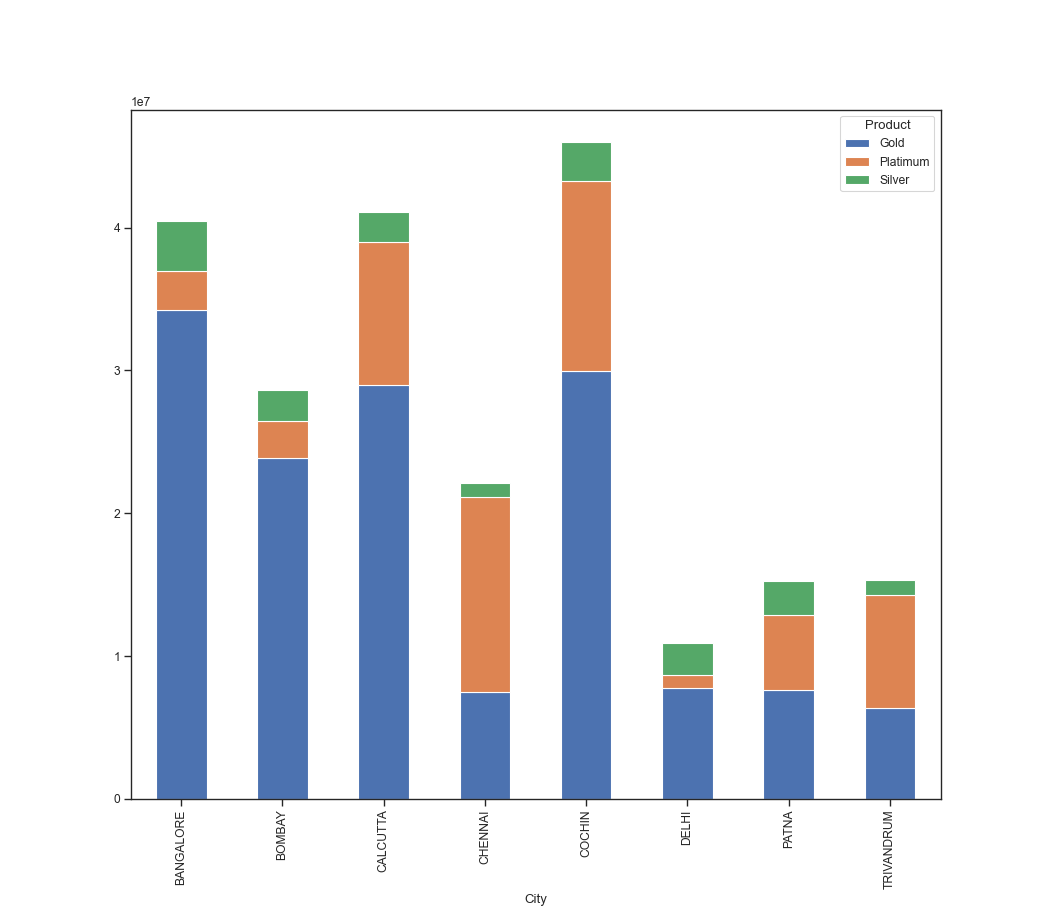

<AxesSubplot:xlabel='City'>

In [39]:
%matplotlib notebook
Cust_chart = pd.crosstab(index=Cust_spend['City'],columns= Cust_spend['Product'],values = Cust_spend['Amount'],aggfunc = 'sum')
Cust_chart.plot(kind = 'bar',stacked = True,figsize = (12, 10.5))

<IPython.core.display.Javascript object>


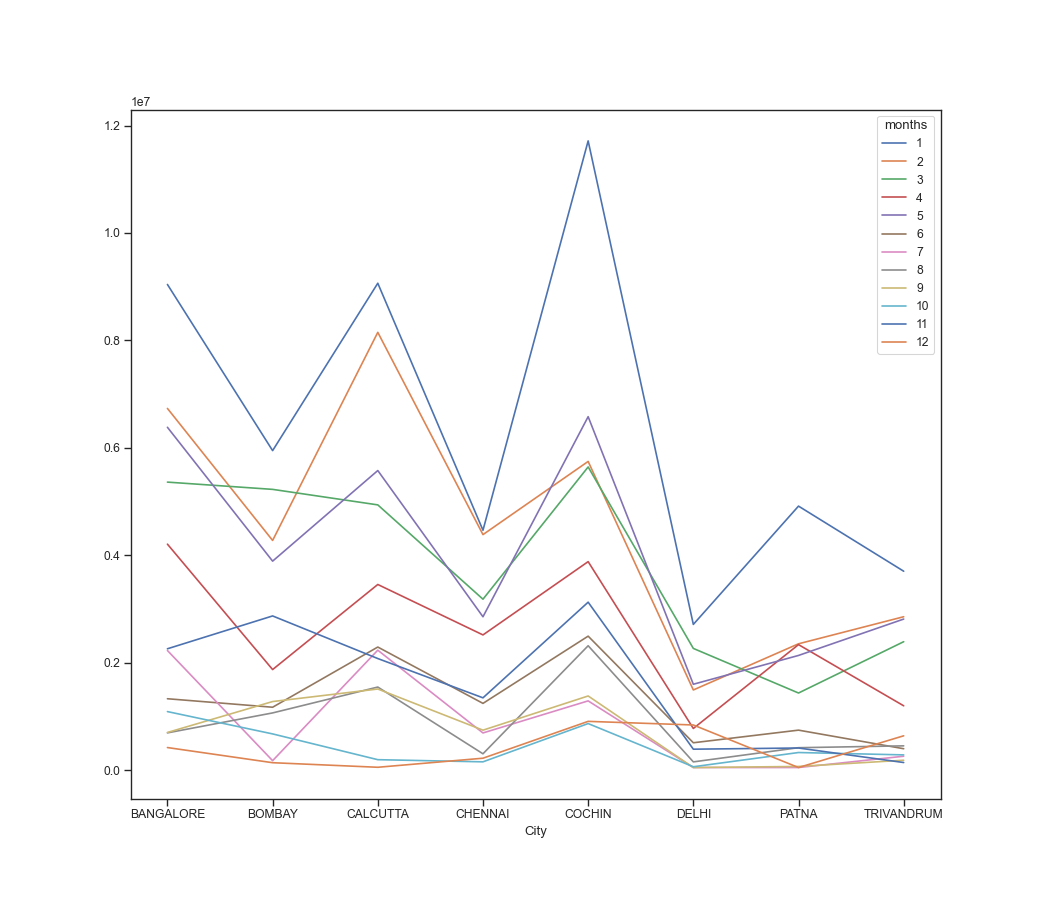

<AxesSubplot:xlabel='City'>

In [42]:
Cust_crosschart = pd.crosstab(index=Cust_spend['City'],columns= Cust_spend['months'],values = Cust_spend['Amount'],aggfunc = 'sum')
Cust_crosschart.plot(figsize = (12,10.5))

***Comparison of yearly spend on air tickets.***


In [41]:
Chart_plot = Cust_spend[Cust_spend['Type'] == 'AIR TICKET']
Chart_plot.groupby('years').Amount.sum().plot(kind = 'bar')
plt.show()

**Comparison of monthly spend for each product.**

<IPython.core.display.Javascript object>


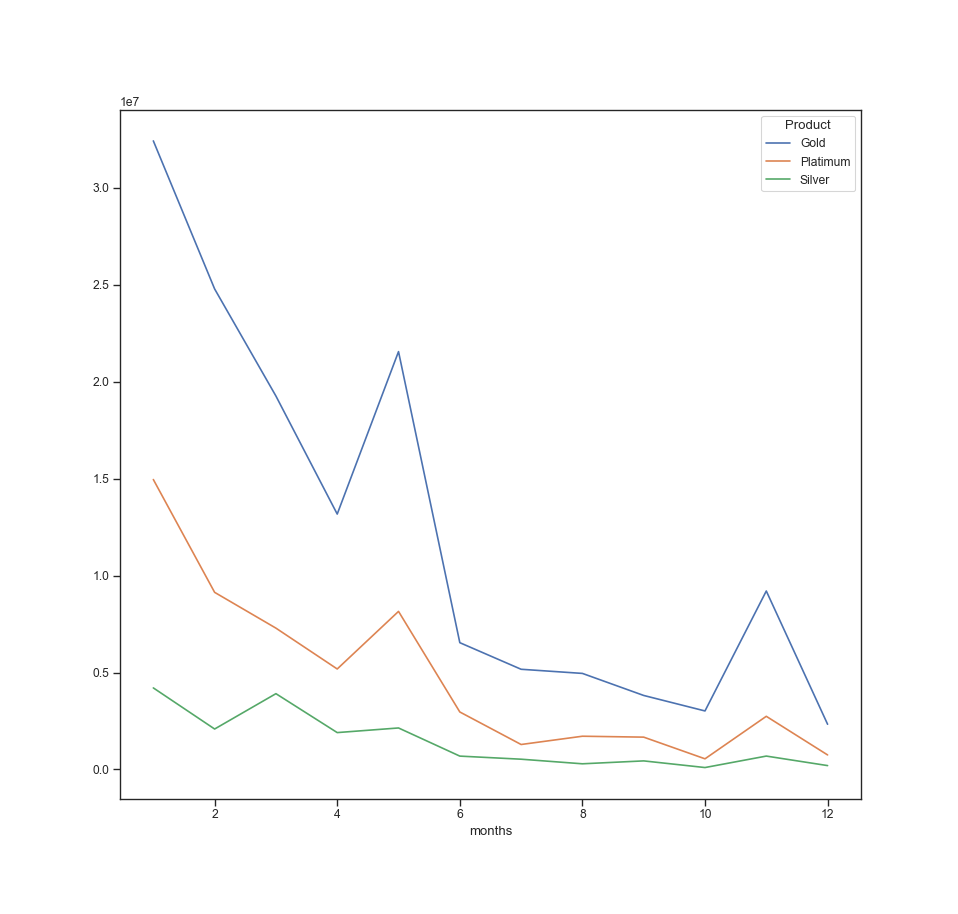

<AxesSubplot:xlabel='months'>

In [260]:
Table = pd.crosstab(index = Cust_spend['months'],columns= Cust_spend['Product'],values = Cust_spend['Amount'],aggfunc = 'sum')
Table.plot(figsize = (11,10.5))

In [292]:
Product = list(Cust_spend.Product.drop_duplicates()) 
Month = list(Cust_spend.months.drop_duplicates())
Year = list(Cust_spend.years.drop_duplicates())

[2004, 2005, 2006]

In [42]:
Cust_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_group,years,months
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,"(70, 80]",2004,1
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,"(70, 80]",2004,1
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,"(70, 80]",2004,1
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,"(70, 80]",2004,1
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,"(70, 80]",2005,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,"(50, 60]",2004,1
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,139018.26,"(50, 60]",2004,1
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,284521.06,"(50, 60]",2004,1
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,90184.22,"(30, 40]",2004,1


In [46]:
Cust_repay['years'] = pd.to_datetime(Cust_repay['Month']).dt.year
Cust_repay['months'] = pd.to_datetime(Cust_repay['Month']).dt.month
Cust_repay

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,years,months
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,495414.75,2004,1
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,245899.02,2004,1
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,259490.06,2004,1
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,437555.12,2004,1
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,165972.88,2005,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,100000.00,2004,1
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,10000.00,2004,1
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,10001.00,2004,1
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,10002.00,2004,1


In [79]:
product =str(input("Enter the name of the Product:"))
Monthly = int(input("Enter the month in numbers:"))
Yearly = int(input("Enter the year:")) 
def check_output(prod,mon,year):
    Product = list(Cust_spend.Product.drop_duplicates()) 
    Month = list(Cust_spend.months.drop_duplicates())
    Year = list(Cust_spend.years.drop_duplicates())
    if (prod in Product) or (mon in Month) or (year in Year):
        result = Cust_repay.groupby(['Customer','City']).Amount.sum().sort_values(ascending=False)
        return result
    else:
        result_n = print("No result available")
        return result_n
                         
        
check_output(product,Monthly,Yearly)


Enter the name of the Product:Silver
Enter the month in numbers:6
Enter the year:2006


Customer  City      
A61       COCHIN        10539142.91
A60       CALCUTTA       9876290.74
A13       BANGALORE      9572000.66
A43       BANGALORE      8489871.46
A45       COCHIN         8448334.87
                           ...     
A83       COCHIN           10002.00
A99       CALCUTTA         10002.00
A98       CALCUTTA         10001.00
A97       TRIVANDRUM       10000.00
A77       BANGALORE         3159.62
Name: Amount, Length: 100, dtype: float64